## Performance Metrics - Facebook 's page

### Goal: 
Prediction of total interaction(Sum of total likes, comments and shares) on a post. 

### Dataset Overview & Preprocessing

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('dataset_Facebook.csv', delimiter=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Some of the columns's names are too long, it will be necessary to renamed them with a shorter label for a better manipulation.

Below are the renamed columns: 

- Lifetime Post Total Reach -> Reach 
- Lifetime Post Total Impressions  -> Impressions
- Lifetime Post Reach by People who like your page -> Reach_ByLiked
- Lifetime Post Impressions by people who have liked your page -> Impressions_ByLiked
- Lifetime Engaged Users -> Engaged
- Lifetime People who have liked your page and engaged with your post -> Engaged_ByLiked

The name chose to renamed the colums were inspired by the work of Rajiv2806. See reference here.

In [3]:
df = df.rename(columns\
               ={'Lifetime Post Total Reach':'Reach',
                 'Lifetime Post reach by people who like your Page':'Reach_ByLiked',
                 'Lifetime Post Impressions by people who have liked your Page':'Impressions_ByLiked',
                 'Lifetime Engaged Users':'Engaged',
                 'Lifetime Post Total Impressions':'Impressions',
                 'Lifetime People who have liked your Page and engaged with your post':'Engaged_ByLiked'
                  })

In [4]:
df.dtypes #List of the features and their data types

Page total likes                int64
Type                           object
Category                        int64
Post Month                      int64
Post Weekday                    int64
Post Hour                       int64
Paid                          float64
Reach                           int64
Impressions                     int64
Engaged                         int64
Lifetime Post Consumers         int64
Lifetime Post Consumptions      int64
Impressions_ByLiked             int64
Reach_ByLiked                   int64
Engaged_ByLiked                 int64
comment                         int64
like                          float64
share                         float64
Total Interactions              int64
dtype: object

If we check the list of the features, we can find that most of the columns are assigned to the correct data types however we might need to convert the data type of the column 'Paid' to boolean and assigned the value 1.0 to True and the value 0.0 to False.

In [5]:
df['Paid'] = df['Paid'].astype(bool)

In [6]:
df['Paid'].value_counts()

False    360
True     140
Name: Paid, dtype: int64

Out of the 500 posts, 140 were paid publications. 

In [7]:
df['Category'].value_counts()

1    215
3    155
2    130
Name: Category, dtype: int64

The column 'Category' has a categorical value distribution and each value represent a type of facebook's post labelled as below: 
- Value [1] = Action 
- Value [2] = Product
- Value [3] = Inspiration

In [8]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Reach,Impressions,Engaged,Lifetime Post Consumers,Lifetime Post Consumptions,Impressions_ByLiked,Reach_ByLiked,Engaged_ByLiked,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


The table above shows some interesting insights of the numerical and categorical features.
The columns Category, Paid and Type are categorical variables and the rest of the variables are totally numerical. 
We will need to create dummy variables in order to implement the categorical data to our regression analysis. 

### Dummy Variables

List of the categorical variables in the dataset: 
    - Type
    - Category
    - Paid

In [9]:
#Lets create the dummy variables for each of these 3 variables
dum = pd.get_dummies(df, columns=['Type', 'Category', 'Paid'],drop_first=True)
dum.head()

,Page total likes,Post Month,Post Weekday,Post Hour,Reach,Impressions,Engaged,Lifetime Post Consumers,Lifetime Post Consumptions,Impressions_ByLiked,...,comment,like,share,Total Interactions,Type_Photo,Type_Status,Type_Video,Category_2,Category_3,Paid_True
0,139441,12,4,3,2752,5091,178,109,159,3078,...,4,79.0,17.0,100,1,0,0,1,0,0
1,139441,12,3,10,10460,19057,1457,1361,1674,11710,...,5,130.0,29.0,164,0,1,0,1,0,0
2,139441,12,3,3,2413,4373,177,113,154,2812,...,0,66.0,14.0,80,1,0,0,0,1,0
3,139441,12,2,10,50128,87991,2211,790,1119,61027,...,58,1572.0,147.0,1777,1,0,0,1,0,1
4,139441,12,2,3,7244,13594,671,410,580,6228,...,19,325.0,49.0,393,1,0,0,1,0,0


Let's specify the features that we will use as indepedant variables(Prior a publication) and the features that will be the dependant variables(Post publication).
#### Inputs: 

- Type 
- Category 
- Post Month  
- Post Weekday  
- Post Hour
- Paid

#### Outputs:
- Total Interactions
- Reach 
- Impressions 

Let's now created a new dataframe which will only have the inputs columns and the outputs columns.

In [10]:
final_df = dum.drop(['Page total likes','Engaged','Lifetime Post Consumers',
                    'Lifetime Post Consumptions', 'Impressions_ByLiked',
                    'Reach_ByLiked', 'Engaged_ByLiked','comment', 'like', 'share'],
                     axis='columns')

In [11]:
final_df.head(10)

,Post Month,Post Weekday,Post Hour,Reach,Impressions,Total Interactions,Type_Photo,Type_Status,Type_Video,Category_2,Category_3,Paid_True
0,12,4,3,2752,5091,100,1,0,0,1,0,0
1,12,3,10,10460,19057,164,0,1,0,1,0,0
2,12,3,3,2413,4373,80,1,0,0,0,1,0
3,12,2,10,50128,87991,1777,1,0,0,1,0,1
4,12,2,3,7244,13594,393,1,0,0,1,0,0
5,12,1,9,10472,20849,186,0,1,0,1,0,0
6,12,1,3,11692,19479,279,1,0,0,0,1,1
7,12,7,9,13720,24137,339,1,0,0,0,1,1
8,12,7,3,11844,22538,192,0,1,0,1,0,0
9,12,6,10,4694,8668,142,1,0,0,0,1,0


In [24]:
final_df.shape

(500, 12)

### Model 1

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Multicollinearity Analysis

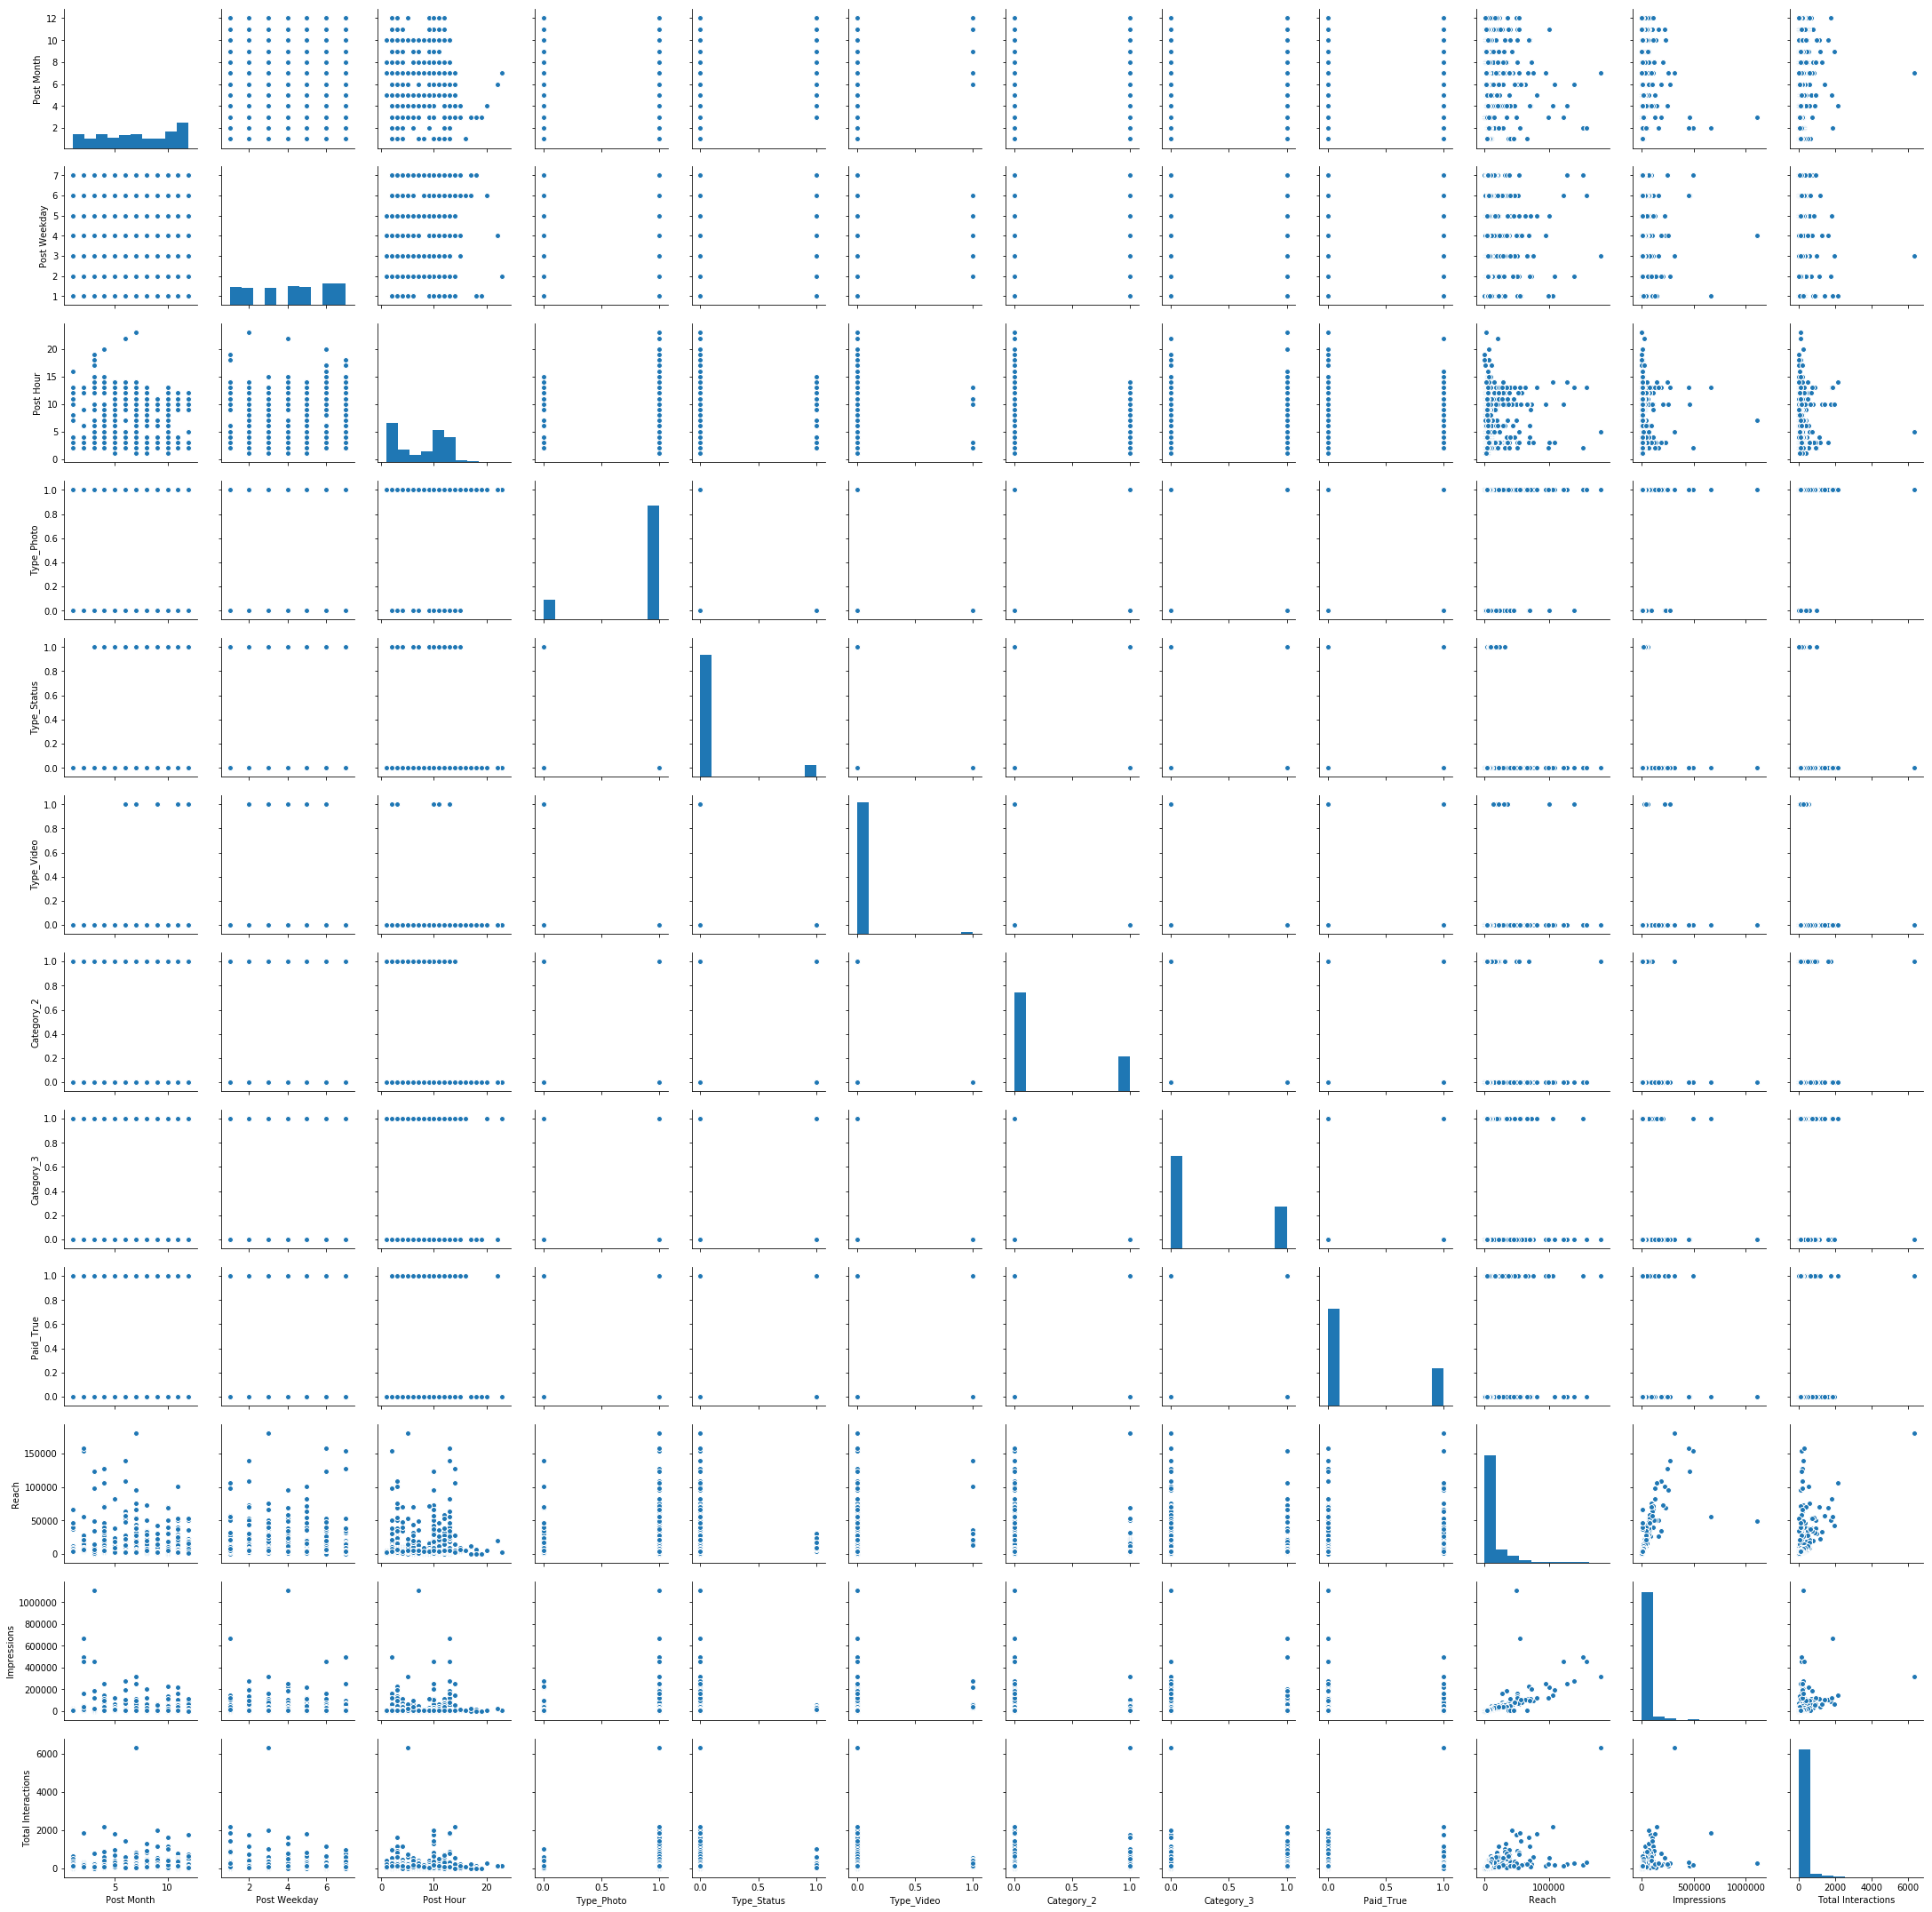

In [26]:
sns.pairplot(final_df, vars=['Post Month','Post Weekday','Post Hour',
                            'Type_Photo', 'Type_Status','Type_Video', 
                            'Category_2', 'Category_3', 'Paid_True',
                            'Reach', 'Impressions', 'Total Interactions'])

The pairplot shows clearly that there is no multicollinearity between the dependants variables, so we good to implement all of them in our regression model, however there is no collinearity as well between the predictors and the dependants variables and this is an issue as it invalidates one of the 4 regression linearity assumptions. 

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
X = final_df.drop(['Reach', 'Impressions', 'Total Interactions'],axis='columns')
X.tail() #Independants variables

,Post Month,Post Weekday,Post Hour,Type_Photo,Type_Status,Type_Video,Category_2,Category_3,Paid_True
495,1,7,2,1,0,0,0,1,0
496,1,5,8,1,0,0,1,0,0
497,1,5,2,1,0,0,0,0,0
498,1,4,11,1,0,0,0,1,0
499,1,4,4,1,0,0,1,0,1


In [16]:
y = final_df.loc[:, ['Reach', 'Impressions', 'Total Interactions']]

In [17]:
y.head() #Dependants variables

,Reach,Impressions,Total Interactions
0,2752,5091,100
1,10460,19057,164
2,2413,4373,80
3,50128,87991,1777
4,7244,13594,393


In [18]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Let's predict now the Reach, Impressions, and the total interactions of a publication that has these parameters below: 
- An Unpaid product picture posted on the brand's page during the month of December on a Wednesday at 3am.   

In [19]:
model.predict([[12,4,3,1,0,0,1,0,0]])  

array([[3604.0208522 , 2808.84333627,  266.30018856]])

In [39]:
model.score(X,y)

0.04840309735030879

### Model 2

For the model 2, let's try the dependants that were left over and let's verify if there is any collinearity between and the predictors. 
- Dependants variables for model 2:
 - Engaged 
 - Lifetime Post Consumers        
 - Lifetime Post Consumptions      
 - Impressions_ByLiked             
 - Reach_ByLiked                  
 - Engaged_ByLiked                
 - comment                         
 - like                          
 - share                         

#### Multicollinearity Analysis

ValueError: max must be larger than min in range parameter.

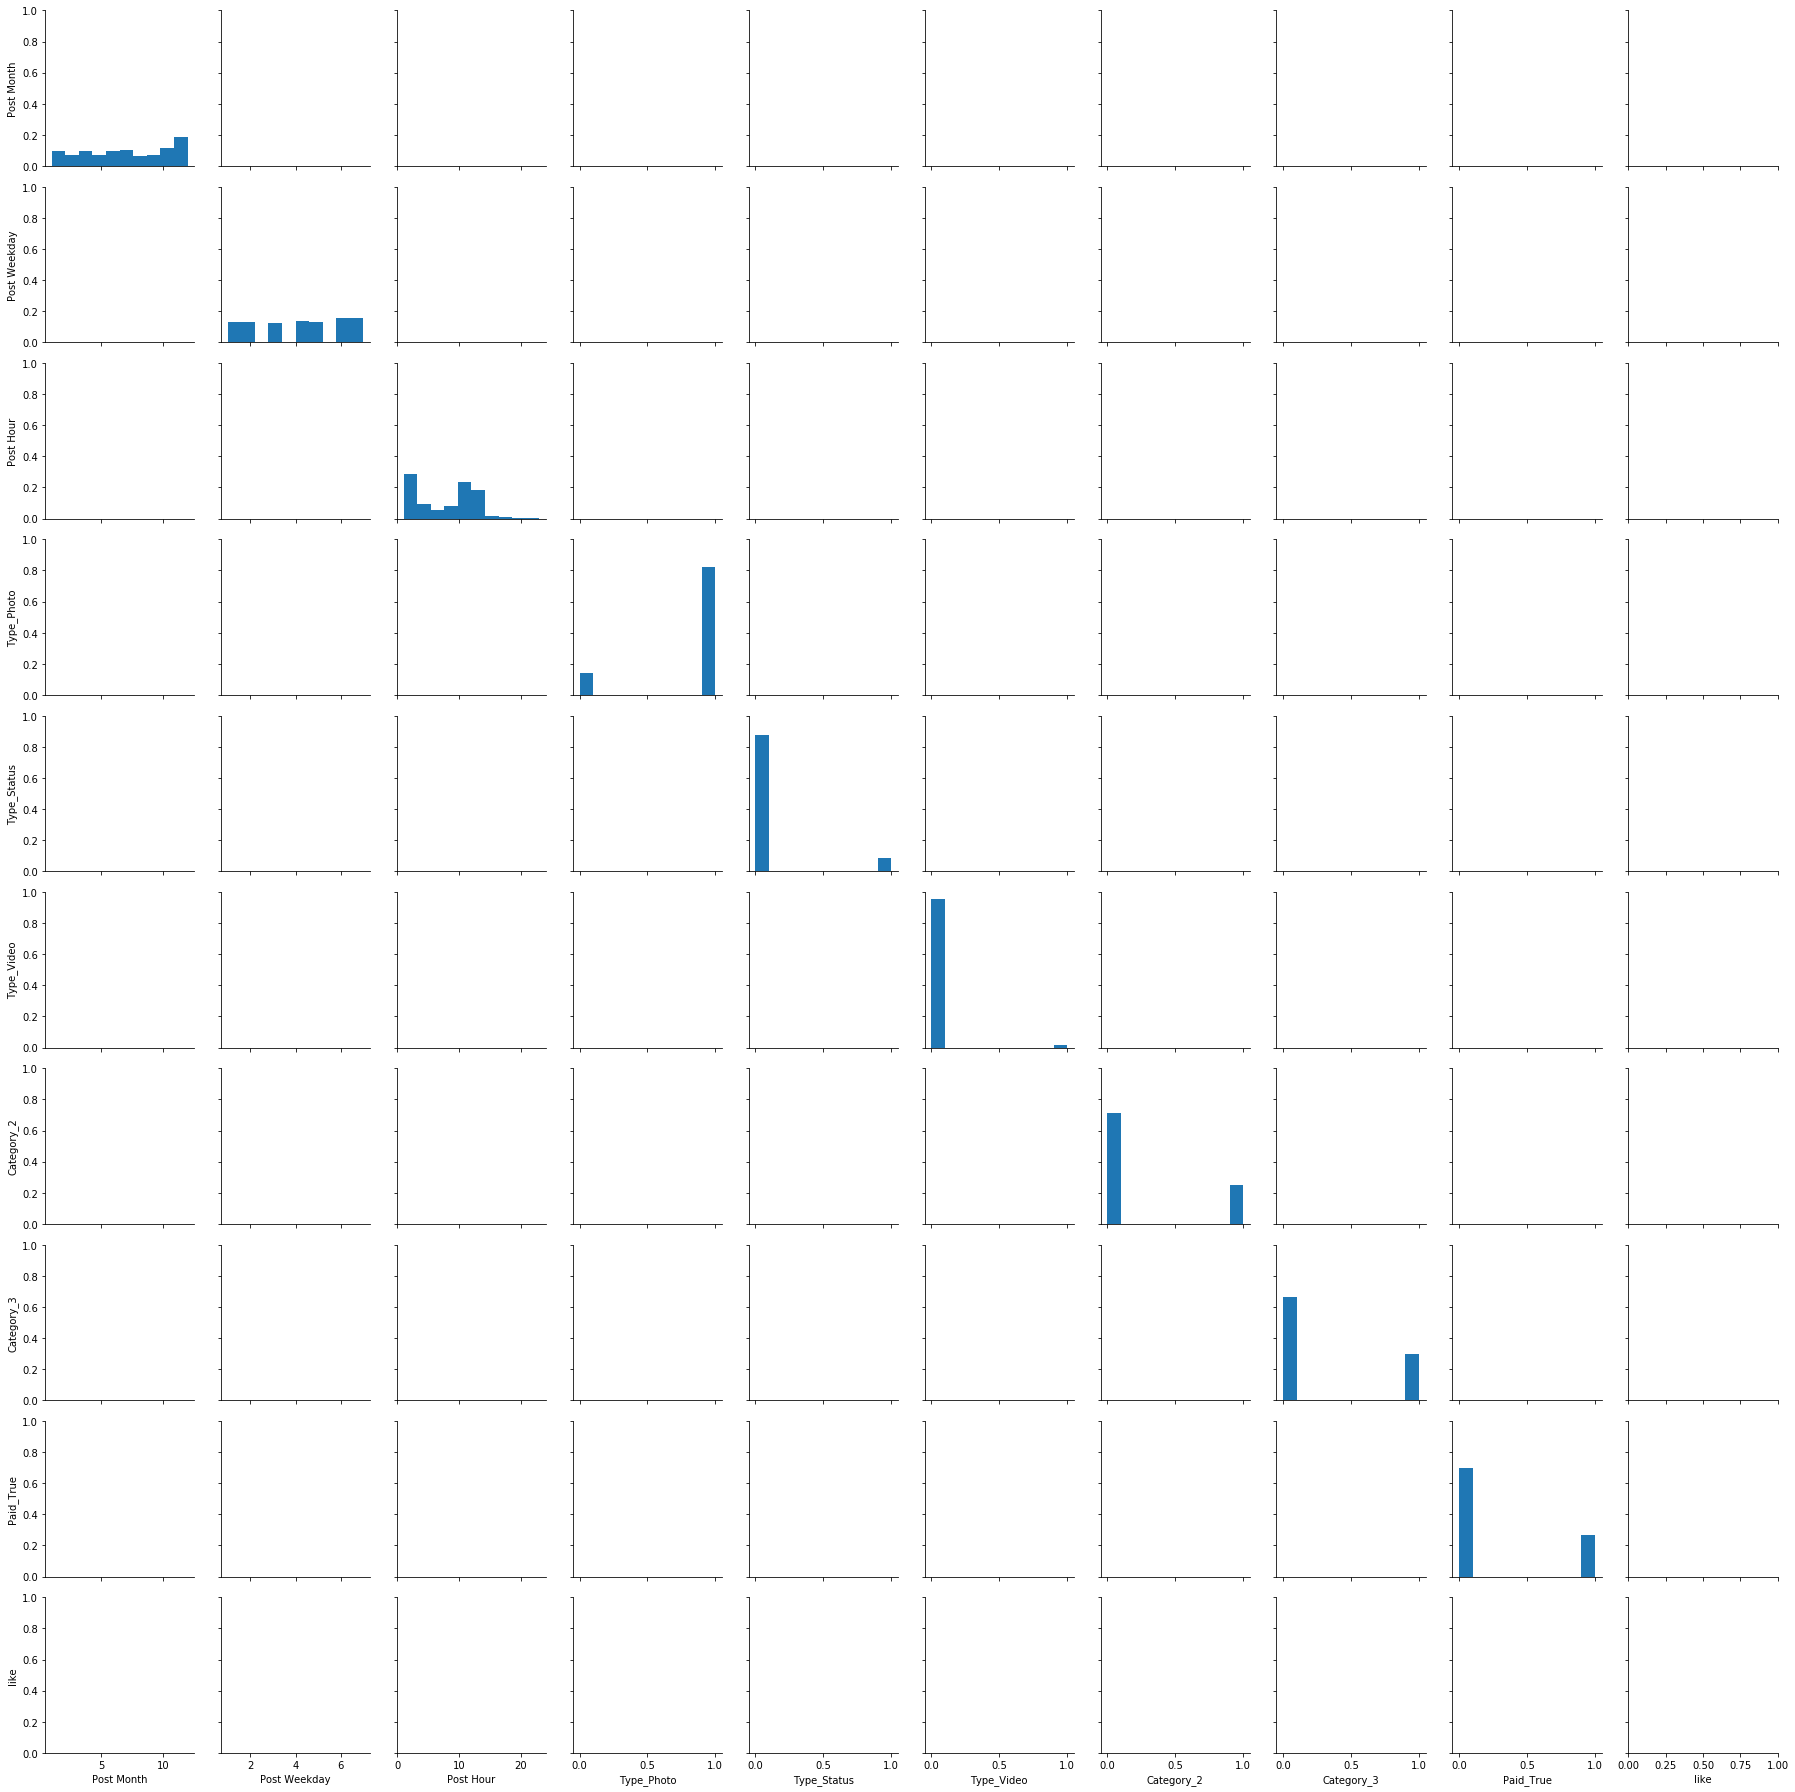

In [40]:
sns.pairplot(dum, vars=['Post Month','Post Weekday','Post Hour',
                            'Type_Photo', 'Type_Status','Type_Video', 
                            'Category_2', 'Category_3', 'Paid_True',
                            'like'
                           ]) 